In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [6]:
import surprise

In [7]:
from surprise import Dataset

In [8]:
from surprise import Reader

In [9]:
df = pd.read_csv("ratings_small.csv")

In [10]:
df = df.drop("timestamp", axis=1)

In [11]:
reader = Reader(line_format = "user item rating", rating_scale=(0,5))

In [12]:
data = Dataset.load_from_df(df, reader = reader)

In [13]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)

# item-based

In [85]:
from surprise import KNNWithMeans

In [86]:
sim_options = {
    "user_based":False
}

In [87]:
algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

In [88]:
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [89]:
from surprise.model_selection import cross_validate

In [90]:
results = cross_validate(algo = algo, data = data, measures = ['RMSE', "MAE"], cv=5, return_train_measures = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [93]:
results['test_rmse'].mean()

0.9183972838462158

In [95]:
results['test_mae'].mean()

0.7049107391805227

# user-based

In [97]:
sim_options = {
    "user_based":True
}

In [98]:
algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

In [99]:
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [100]:
from surprise.model_selection import cross_validate

In [101]:
results = cross_validate(algo = algo, data = data, measures = ['RMSE', "MAE"], cv=5, return_train_measures = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [102]:
results['test_rmse'].mean()

0.9174008413003266

In [103]:
results['test_mae'].mean()

0.7042674620837621

# PMF

In [105]:
from surprise import SVD

In [106]:
algo = SVD()

In [107]:
algo.fit(trainset)

In [108]:
from surprise.model_selection import cross_validate

In [109]:
results = cross_validate(algo = algo, data = data, measures = ['RMSE', "MAE"], cv=5, return_train_measures = True)

In [111]:
results['test_rmse'].mean()

0.8963543838751253

In [112]:
results['test_mae'].mean()

0.6905689395599492

### The results show that PMF is performing better comparing to user based and item based methods, considering its smaller rmse and mae values

# comparing three similarity metrics (cosine, pearson, and msd) on User based and Item based 

## item based

In [14]:
y1 = []

In [15]:
from surprise import KNNWithMeans

sim_options = {
    "name" : "cosine",
    "user_based":False
}

algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

algo.fit(trainset)

from surprise.model_selection import cross_validate

results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

y1.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [16]:
sim_options = {
    "name" : "msd",
    "user_based":False
}

algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

algo.fit(trainset)

from surprise.model_selection import cross_validate

results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

y1.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [17]:
sim_options = {
    "name" : "pearson",
    "user_based":False
}

algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

algo.fit(trainset)

from surprise.model_selection import cross_validate

results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

y1.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [18]:
x = ["cosine","msd", "pearson"]

In [30]:
y1

[0.9173060158474705, 0.9172605729163494, 0.9180511287298337]

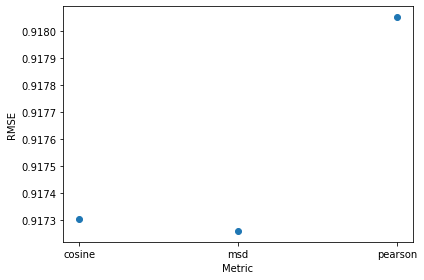

In [31]:
plt.scatter(x,y1)
plt.xlabel("Metric")
plt.ylabel("RMSE")
plt.tight_layout()
plt.savefig("Q3e_itembased.png")

## user based

In [19]:
y2 = []

In [20]:
from surprise import KNNWithMeans

sim_options = {
    "name" : "cosine",
    "user_based":True
}

algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

algo.fit(trainset)

from surprise.model_selection import cross_validate

results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

y2.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [21]:
sim_options = {
    "name" : "msd",
    "user_based":True
}

algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

algo.fit(trainset)

from surprise.model_selection import cross_validate

results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

y2.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [22]:
sim_options = {
    "name" : "pearson",
    "user_based":True
}

algo = KNNWithMeans(
    k = 15, min_k = 5, sim_option = sim_options
    )

algo.fit(trainset)

from surprise.model_selection import cross_validate

results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

y2.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [23]:
x = ["cosine","msd", "pearson"]

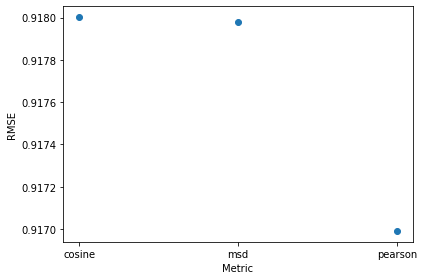

In [29]:
plt.scatter(x,y2)
plt.xlabel("Metric")
plt.ylabel("RMSE")
plt.tight_layout()
plt.savefig("Q3e_userbased.png")

### no, the plots show that the impact of three metrics is not the same on user based and item based collaborative filtering.

# effect of number of neighbors

## item based

In [141]:
from surprise import KNNWithMeans

sim_options = {
    "user_based":False
}
rmse = []
for i in range(5,21):
    
    algo = KNNWithMeans(
        k = i, min_k = 5, sim_option = sim_options
        )

    algo.fit(trainset)

    from surprise.model_selection import cross_validate

    results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

    rmse.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [182]:
x = list(range(5,21))

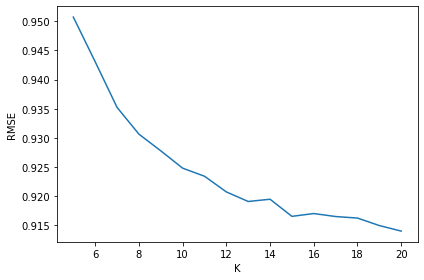

In [183]:
plt.plot(x,rmse)
plt.ylabel("RMSE")
plt.xlabel("K")
plt.tight_layout()
plt.savefig("Q3f_itembased.png")

In [142]:
from surprise import KNNWithMeans

sim_options = {
    "user_based":True
}
rmse_userbased = []
for i in range(5,21):
    
    algo = KNNWithMeans(
        k = i, min_k = 5, sim_option = sim_options
        )

    algo.fit(trainset)

    from surprise.model_selection import cross_validate

    results = cross_validate(algo = algo, data = data, measures = ['RMSE'], cv=5, return_train_measures = True)

    rmse_userbased.append(results['test_rmse'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [184]:
x = list(range(5,21))

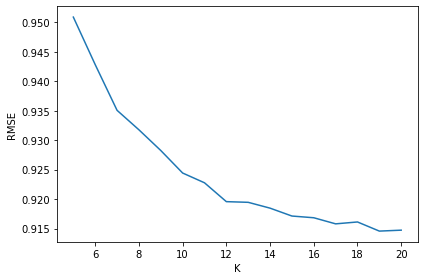

In [185]:
plt.plot(x,rmse_userbased)
plt.ylabel("RMSE")
plt.xlabel("K")
plt.tight_layout()
plt.savefig("Q3f_userbased.png")

In [143]:
import pickle

with open('rmse_itembased', 'wb') as fp:
    pickle.dump(rmse, fp)

In [144]:
with open('rmse_userbased', 'wb') as fp:
    pickle.dump(rmse_userbased, fp)